In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Some of these packages will generate a ton of warnings...
import warnings
warnings.filterwarnings("ignore")

In [2]:
def PlotBoundaries(model, X, Y, figsize=(10,7)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_padding = max(int(0.1*(X[:, 0].max() - X[:, 0].min())), 1)
    y_padding = max(int(0.1*(X[:, 1].max() - X[:, 1].min())), 1)
    
    x_resolution, y_resolution = 0.1, 0.1
    
    x_min, x_max = X[:, 0].min() - x_padding, X[:, 0].max() + x_padding
    y_min, y_max = X[:, 1].min() - y_padding ,X[:, 1].max() + y_padding
    xx, yy = np.meshgrid(np.arange(x_min, x_max, x_resolution), np.arange(y_min, y_max, y_resolution))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.ylim(y_min, y_max)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
    plt.show()

In [3]:
def PlotEnsembleBoundaries(ensembles, X, Y, shape, figsize=(10,7)) :
    '''
    Helper function to plot the boundaries of ensemble methods.
    code modified from: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html
    '''
    
    x_padding = max(int(0.1*(X[:, 0].max() - X[:, 0].min())), 1)
    y_padding = max(int(0.1*(X[:, 1].max() - X[:, 1].min())), 1)
    
    
    x_resolution, y_resolution = 0.1, 0.1
    
    plt.figure(figsize=figsize)
    fig, axes = plt.subplots(shape[0],shape[1], figsize=figsize)
    for i, (ax, model) in enumerate(zip(axes.ravel(), ensembles)):
        x_min, x_max = X[:, 0].min() - x_padding, X[:, 0].max() + x_padding
        y_min, y_max = X[:, 1].min() - y_padding, X[:, 1].max() + y_padding
        xx, yy = np.meshgrid(np.arange(x_min, x_max, x_resolution), np.arange(y_min, y_max, y_resolution))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.4)

        #Plot
        ax.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax.set_ylim(y_min, y_max)

    plt.show()

In [4]:
# ADABOOST
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
#Use two dimensions of cancer for ease of visualization.
X = cancer.data[:,[1,3]]
y = cancer.target

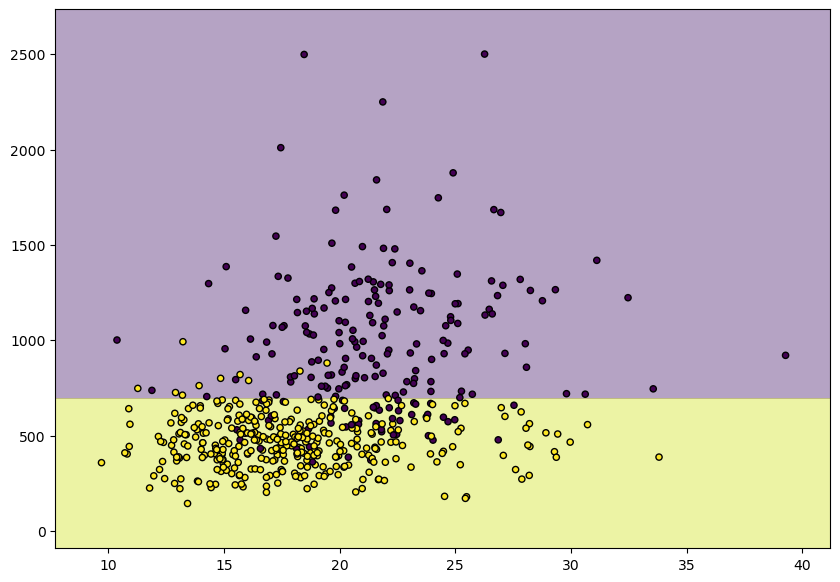

In [6]:
from sklearn.ensemble import AdaBoostClassifier

#fitting Adaptive Boosting
AdaBoost_model = AdaBoostClassifier(n_estimators=2)
AdaBoost_model.fit(X, y)

# Plotting decision regions
PlotBoundaries(AdaBoost_model, X, y)

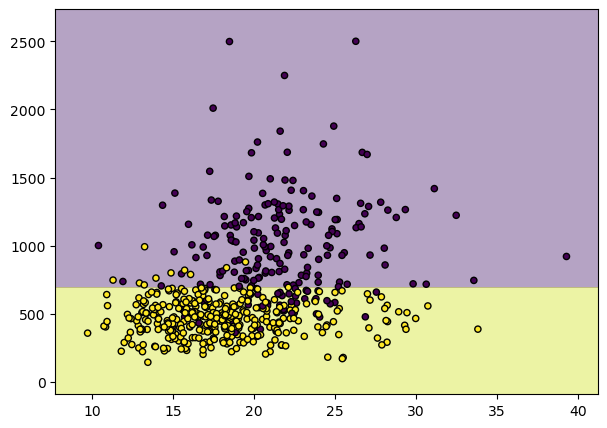

In [7]:
models = [AdaBoost_model.estimators_[0], AdaBoost_model.estimators_[1]];
PlotBoundaries(models[0], X, y, figsize=(7,5)) 

Misclassisfied datapoints will have increased weights in the next iteration.

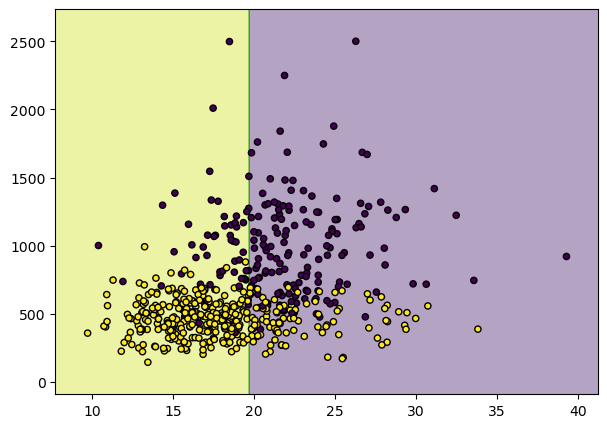

In [8]:
PlotBoundaries(models[1], X, y, figsize=(7,5))

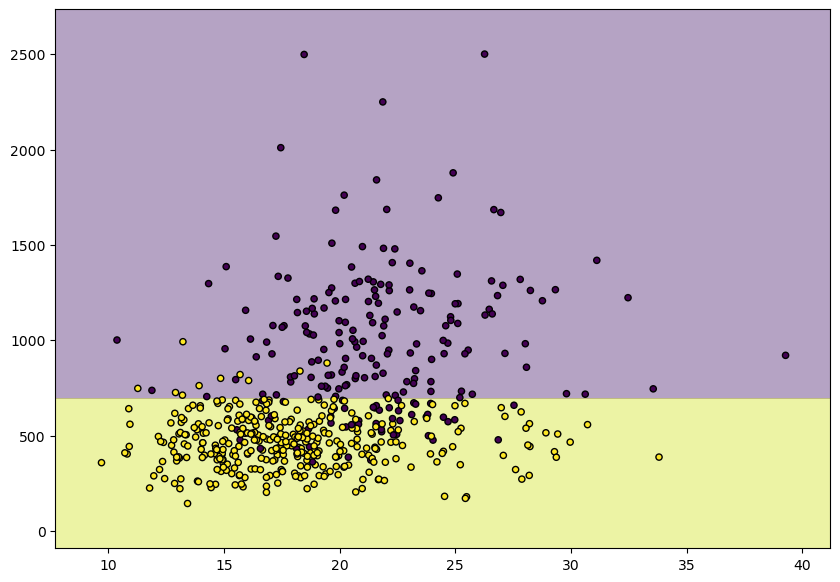

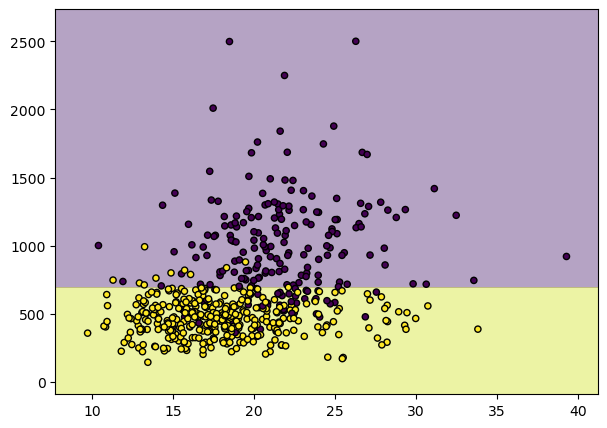

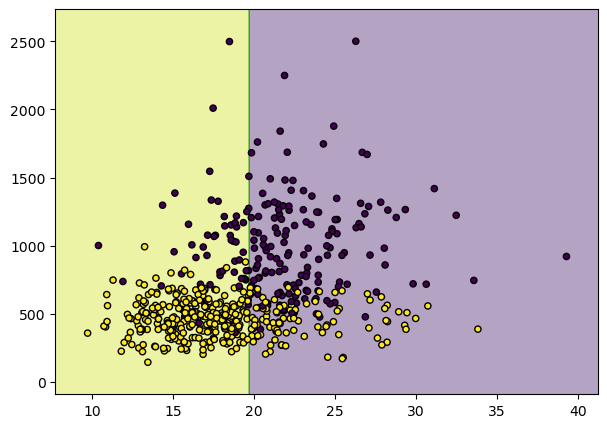

In [9]:
#First model is the ensemble, second is the first tree, third is the second tree.
PlotBoundaries(AdaBoost_model, X, y) 
PlotBoundaries(models[0], X, y, figsize=(7,5)) 
PlotBoundaries(models[1], X, y, figsize=(7,5)) 

the ensemble model is the first plot while its components are the second and third plots.

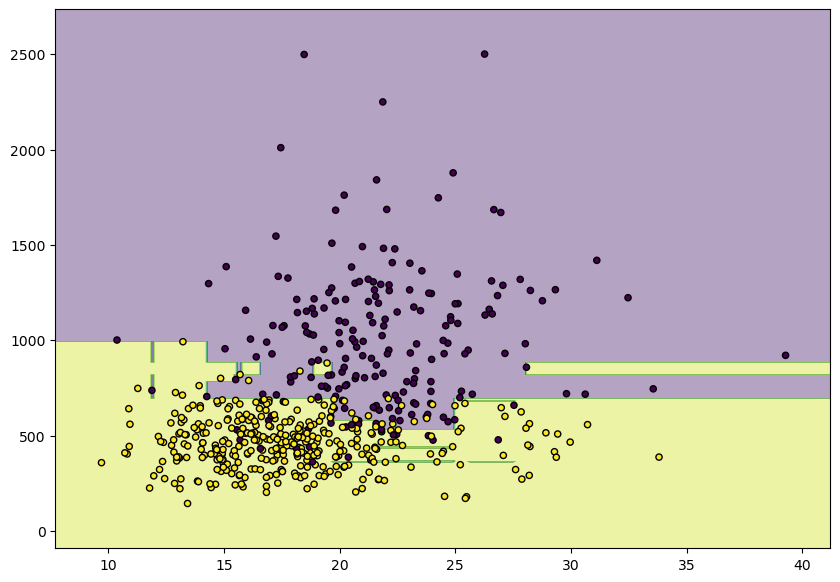

In [10]:
from sklearn.ensemble import AdaBoostClassifier

#fitting the Booster
AdaBoost_model = AdaBoostClassifier(n_estimators=50)
AdaBoost_model.fit(X, y)

# Plotting decision regions
PlotBoundaries(AdaBoost_model, X, y) 

<Figure size 1000x700 with 0 Axes>

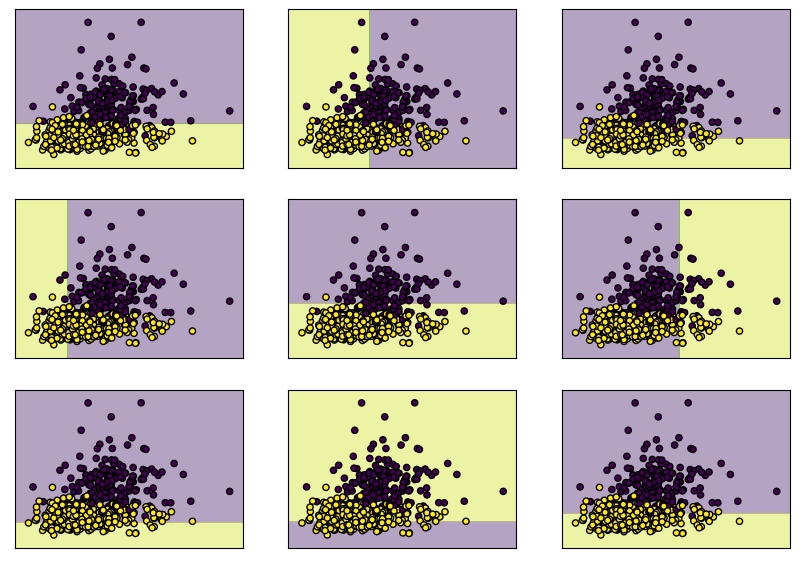

In [11]:
models = []
for i in range(9) :
    models.append(AdaBoost_model.estimators_[i])
    
PlotEnsembleBoundaries(models, X, y, (3,3));

we need to regularize the number of estimators in the ensemble model to avoid overfitting. contrary to bagging, boosting can overfit if the number of estimators is too large. For random forest, growing the fully grown trees, we know there will be some overfitting, however we average all the fits together which cancel out the overfitting of each model. For boosting, overfitting can be amplified since we are not averaging the fits together, rather one model trying to learn from the errors of the previous model to produce the fiinal model. 

### compare Adaboost, random forest, and decision trees

In [12]:
from sklearn.model_selection import train_test_split
ancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=3)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

AB_model = AdaBoostClassifier()
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()

AB_model.fit(X_train, y_train)
DT_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)

print("Test Set Scores:")
print(f"AdaBoost score: {AB_model.score(X_test,y_test)}")
print(f"Random Forest score: {RF_model.score(X_test,y_test)}")
print(f"Decision Tree score: {DT_model.score(X_test,y_test)}")

Test Set Scores:
AdaBoost score: 0.9736842105263158
Random Forest score: 0.9692982456140351
Decision Tree score: 0.9298245614035088


In [13]:
# add noise to data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Add some noise to the data (notice how I'm adding on the noise here)
random_state = np.random.RandomState(10)

n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 300*n_features)]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=3)

In [14]:
X.shape

(569, 9030)

In [15]:
AB_model = AdaBoostClassifier()
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()

AB_model.fit(X_train, y_train)
DT_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)

print("Test Set Scores:")
print(f"AdaBoost score: {AB_model.score(X_test,y_test)}")
print(f"Random Forest score: {RF_model.score(X_test,y_test)}")
print(f"Decision Tree score: {DT_model.score(X_test,y_test)}")

Test Set Scores:
AdaBoost score: 0.9692982456140351
Random Forest score: 0.956140350877193
Decision Tree score: 0.9122807017543859


In [16]:
# use real data
data = pd.read_csv("db.csv")

X = data.iloc[:,0:7]
y = data.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=3)

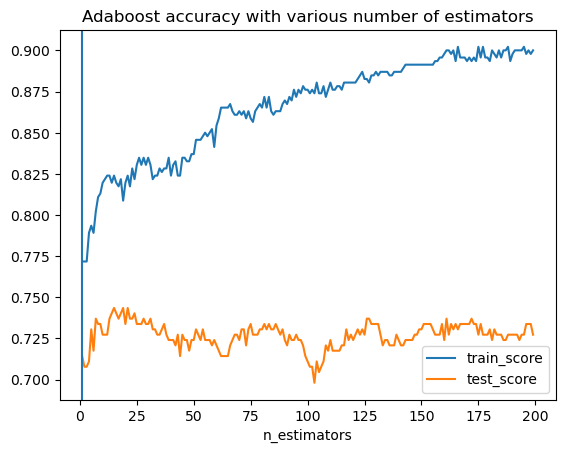

In [30]:
n_estimators = list(range(1, 200))
res = pd.DataFrame()
for i in n_estimators:
    adaboost_mod = AdaBoostClassifier(n_estimators=i)
    adaboost_mod.fit(X_train, y_train)

    train_score = adaboost_mod.score(X_train, y_train)
    test_score = adaboost_mod.score(X_test, y_test)

    res = res.append({
        "n_estimators": i, 
        "train_score": train_score, 
        "test_score": test_score
    }, ignore_index = True)

res.plot(x = "n_estimators", y = ["train_score", "test_score"], 
kind = "line", ax = plt.gca())
plt.legend()
plt.title("Adaboost accuracy with various number of estimators")
plt.axvline(np.max(res.test_score))
plt.show()

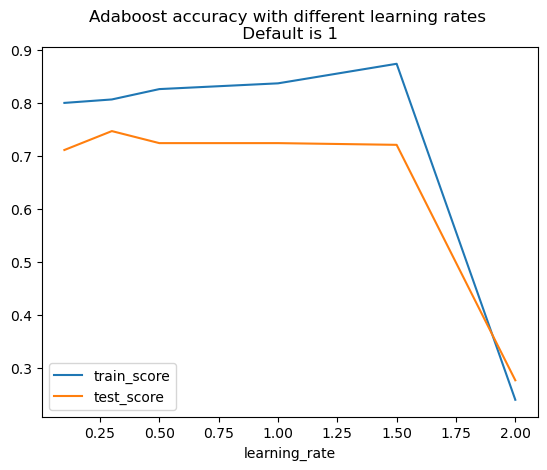

In [28]:
# n_estimators = list(range(1, 200))
learn_rate = [0.1, 0.3, 0.5, 1, 1.5, 2]
res = pd.DataFrame()
for i in learn_rate:
    adaboost_mod = AdaBoostClassifier(learning_rate=i)
    adaboost_mod.fit(X_train, y_train)

    train_score = adaboost_mod.score(X_train, y_train)
    test_score = adaboost_mod.score(X_test, y_test)

    res = res.append({
        "learning_rate": i, 
        "train_score": train_score, 
        "test_score": test_score
    }, ignore_index = True)

res.plot(x = "learning_rate", y = ["train_score", "test_score"], 
kind = "line", ax = plt.gca())
plt.legend()
plt.title("Adaboost accuracy with different learning rates \n Default is 1 ")
plt.show()

## Gradient Boosting

while adaboost increases the weight of misclassified data points, gradient boosting fits the new model to the residual errors of the previous model. As we fit residuals through different iterations, we are able to fit the data better and better and produce greater accuracy.

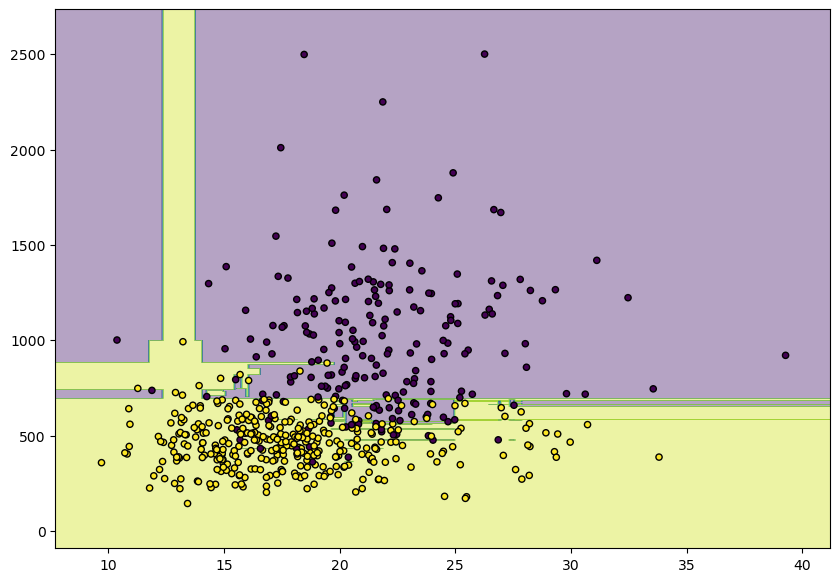

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

#Generate some data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data[:,[1,3]]
y = cancer.target


#fitting Boosting
grad_boost_model = GradientBoostingClassifier()
grad_boost_model.fit(X, y)

# Plotting decision regions
PlotBoundaries(grad_boost_model, X, y) 

for adaboost, a stump is the base estimator while for goobst, the default base estimator is a decision tree with max depth of 3.

<Figure size 1000x700 with 0 Axes>

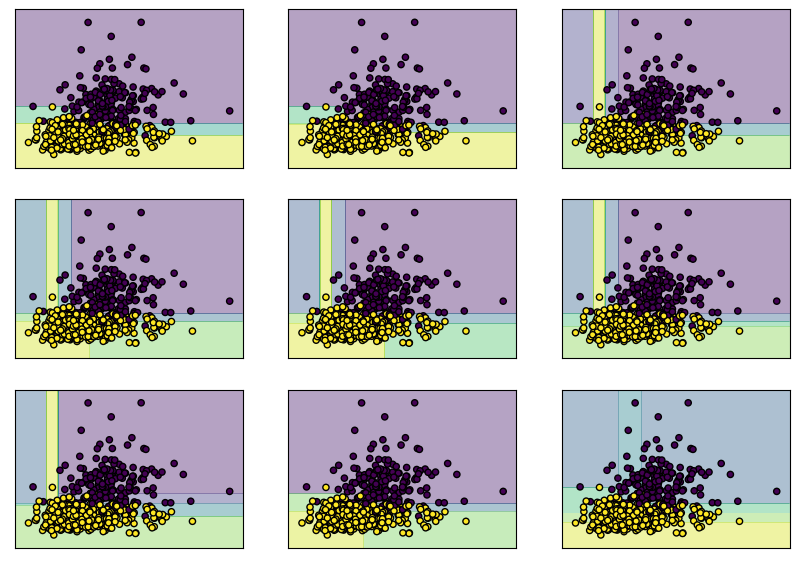

In [32]:
models = []
for i in range(9) :
    models.append(grad_boost_model.estimators_[i][0])
    
PlotEnsembleBoundaries(models, X, y, (3,3));

In [33]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Add some noise to the data
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 300*n_features)]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=3)

In [34]:
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
AB_model = AdaBoostClassifier()


DT_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)
AB_model.fit(X_train, y_train)


print("Test Set Scores:")
print(f"Random Forest score: {RF_model.score(X_test,y_test)}")
print(f"Decision Tree score: {DT_model.score(X_test,y_test)}")
print(f"AdaBoost score: {AB_model.score(X_test,y_test)}")


Test Set Scores:
Random Forest score: 0.9429824561403509
Decision Tree score: 0.9122807017543859
AdaBoost score: 0.9692982456140351


In [35]:
GB_model = GradientBoostingClassifier(verbose=1)
GB_model.fit(X_train, y_train)
print(f"Gradient Boost score: {GB_model.score(X_test,y_test)}")

      Iter       Train Loss   Remaining Time 
         1           1.1608           52.99s
         2           1.0207           52.62s
         3           0.9030           52.20s
         4           0.8045           52.18s
         5           0.7204           51.53s
         6           0.6397           50.75s
         7           0.5700           49.99s
         8           0.5096           49.28s
         9           0.4574           48.86s
        10           0.4129           48.29s
        20           0.1604           42.78s
        30           0.0715           37.20s
        40           0.0376           31.84s
        50           0.0204           26.51s
        60           0.0115           21.20s
        70           0.0067           15.89s
        80           0.0042           10.62s
        90           0.0028            5.34s
       100           0.0018            0.00s
Gradient Boost score: 0.956140350877193


### Adaptive Boosting vs Gradient Boosting

In [36]:
#Let's use a smaller dataset.

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=3)

In [38]:
AB_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

AB_model.fit(X_train, y_train);
GB_model.fit(X_train, y_train);

In [39]:
print(type(AB_model.estimators_[0]))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [40]:
#This looks weird... For two reasons...
print(type(GB_model.estimators_[0]))

# alright, let's unpack further?
print(type(GB_model.estimators_[0][0]))

<class 'numpy.ndarray'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


In [41]:
GB_model.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7FBF50A89740)],
      dtype=object)

#### Regression Trees

In [42]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

# Put into a dataframe
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['median_house_value'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [43]:
# Grab only longitude and latitude
X = california_df[['Longitude', 'Latitude']].values
y = california_df['median_house_value']

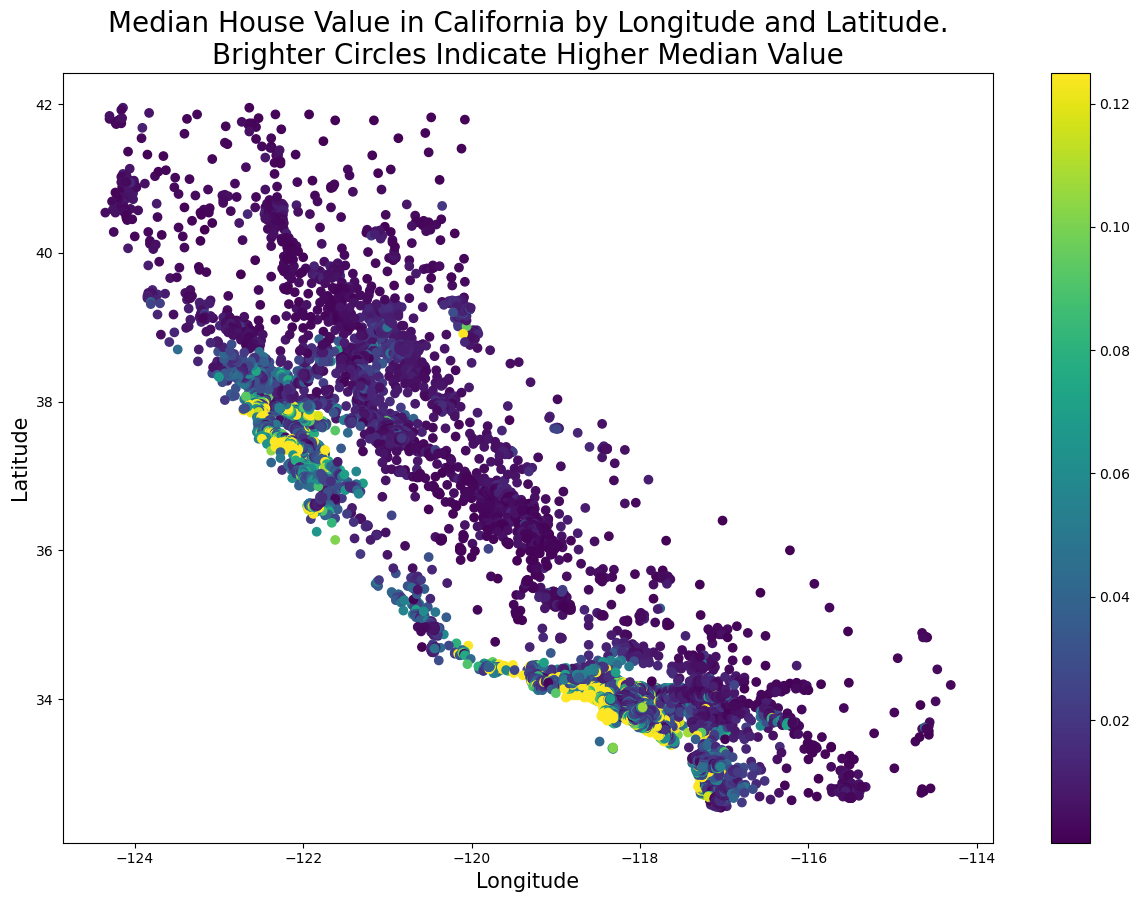

In [44]:
plt.figure(figsize=(15,10))
plt.scatter(X[:,0], X[:, 1], c=(y**2)/200)
plt.title("Median House Value in California by Longitude and Latitude.\
\nBrighter Circles Indicate Higher Median Value", size=20)
plt.xlabel("Longitude", size=15)
plt.ylabel("Latitude", size=15)
plt.colorbar()
plt.show()


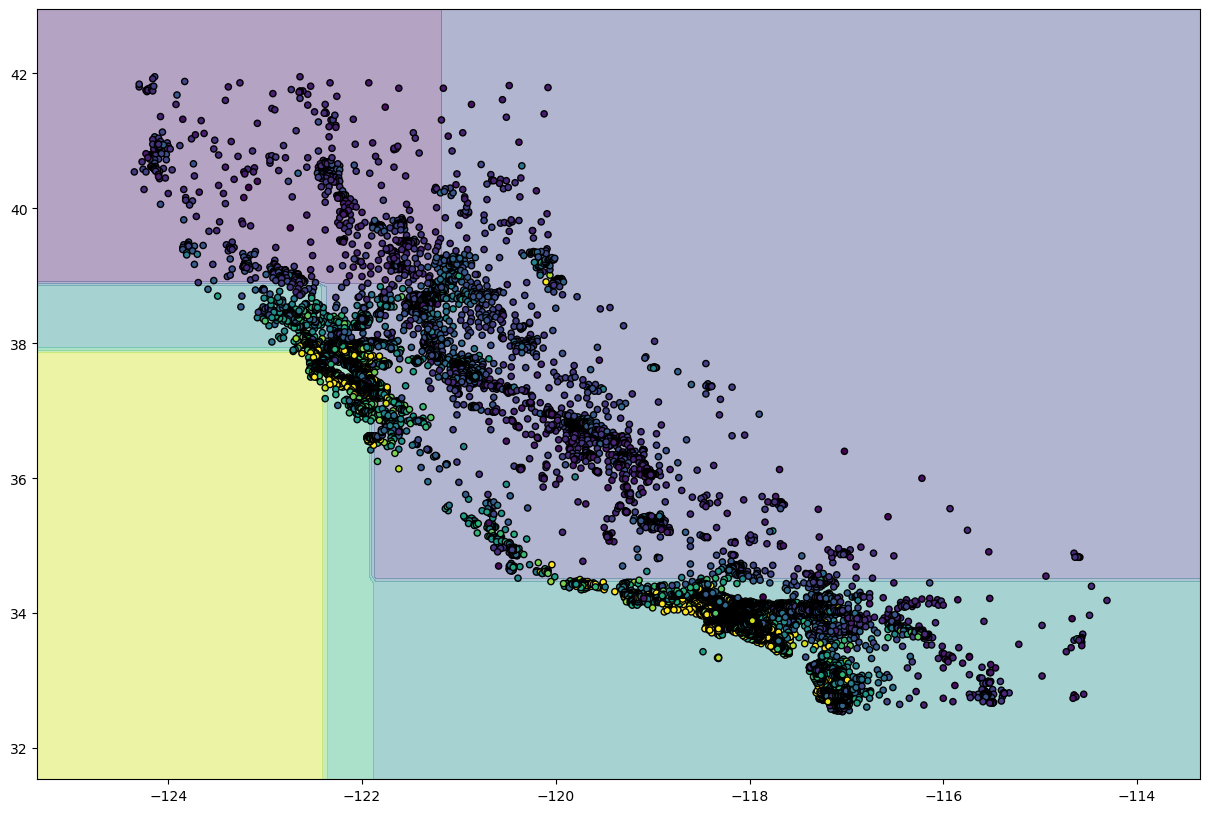

In [45]:
# fit regression tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

PlotBoundaries(tree, X,y, figsize=(15,10))

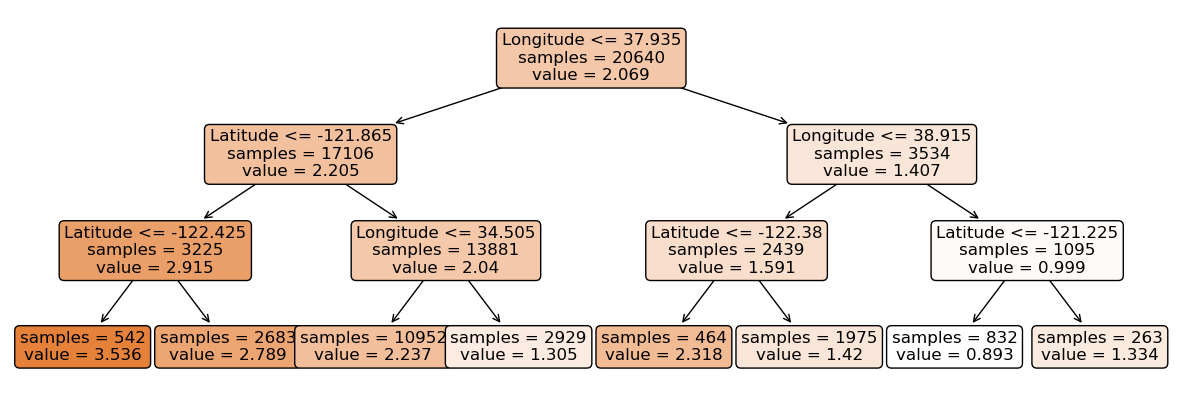

In [46]:
from sklearn.tree import plot_tree
# size for our tree figure
fig, ax = plt.subplots(figsize=(15,5))

plot_tree(tree,
          feature_names=california_df.columns[6:8],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12);

for gboost, we are using residuals. if we use a regression classifier, the residuals would be either 0 or 1, which doesn't tell us how much error our model is doing for each node. therefore, we use regression tree to estimate that

In [47]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

AB_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

AB_model.fit(X, y);
GB_model.fit(X, y);

In [48]:
GB_model.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7FBF50A89740),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7FBF50A89740),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7FBF50A89740)],
      dtype=object)

In [49]:
AB_model.estimators_[0]

DecisionTreeClassifier(max_depth=1, random_state=1523027320)

## XGBoost

difference between this and the gradient boosting is that xgboost uses a more regularized model to control overfitting. 

In [50]:
from xgboost import XGBClassifier

cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target

# Add some noise to the data (notice how I'm adding on the noise here)
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 300*n_features)]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=3)


XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
print(f"XG Boost score: {XGB_model.score(X_test, y_test)}")

XG Boost score: 0.9649122807017544


In [52]:
## use a more complex data

XGB_model = XGBClassifier()
AB_model = AdaBoostClassifier()
RF_model = RandomForestClassifier()

XGB_model.fit(X_train, y_train)
AB_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)

print("Test Set Scores:")
print(f"AdaBoost score: {AB_model.score(X_test, y_test)}")
print(f"Random Forest score: {RF_model.score(X_test, y_test)}")
print(f"XG Boost score: {XGB_model.score(X_test, y_test)}")

Test Set Scores:
AdaBoost score: 0.9692982456140351
Random Forest score: 0.9517543859649122
XG Boost score: 0.9649122807017544


In [53]:
%%timeit
XGB_model.fit(X_train, y_train)
XGB_model.predict(X_test)

1.37 s ± 90.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%%timeit
AB_model.fit(X_train, y_train)
AB_model.predict(X_test)

11 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
%%timeit
RF_model.fit(X_train, y_train)
RF_model.predict(X_test)

895 ms ± 31.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
